# IS 362 Final Project: Analyzing US Employment Trends and Economic Indicators

Tyler DeCaro
12/14/2025

## Project Overview
This project is designed to analyze US employment and economic trends to identify patterns of economic downturn and job market changes. 

We will use data from the Federal Reserve Economic Data (FRED) to examine unemployment rates, GDP, and employment trends across different sectors.


## Data Sources
1. **FRED API**: Unemployment rate, GDP, employment data
2. **CSV data from FRED**: Additional economic indicators (as secondary source type)

## 1. Setup and Import Libraries

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

# Style settings for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Acquisition

We'll get data from two different sources:
1. **FRED API** - for unemployment and GDP data
2. **Direct CSV download from FRED** - for employment by sector data

### 2.1 Getting Data from FRED API

FRED provides free economic data. We'll use their API to get unemployment rate and GDP data.

In [52]:
# FRED API setup
API_KEY = 'ffd4ec25b086087761dbfe99786523df' 

USE_API = True 

def get_fred_data(series_id, api_key):
    """
    Get data from FRED API
    series_id: FRED series identifier
    api_key: your FRED API key
    """
    url = f'https://api.stlouisfed.org/fred/series/observations'
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json'
    }
    
    response = requests.get(url, params=params)
    data = response.json()
    
    # Convert to dataframe
    df = pd.DataFrame(data['observations'])
    return df

print("FRED API function ready!")

FRED API function ready!


### 2.2 Download Data (Using CSV URLs - No API Key Required)

For simplicity and reproducibility, we'll use direct CSV downloads from FRED

In [53]:
# Download unemployment rate data
# UNRATE = US Unemployment Rate
unemployment_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE'
unemployment_df = pd.read_csv(unemployment_url)

# IMPORTANT: Always check what columns actually exist in the data!
print("Column names in unemployment data:", unemployment_df.columns.tolist())
print("Unemployment data shape:", unemployment_df.shape)
print("\nFirst few rows:")
print(unemployment_df.head())

Column names in unemployment data: ['observation_date', 'UNRATE']
Unemployment data shape: (933, 2)

First few rows:
  observation_date  UNRATE
0       1948-01-01     3.4
1       1948-02-01     3.8
2       1948-03-01     4.0
3       1948-04-01     3.9
4       1948-05-01     3.5


In [54]:
# Download GDP data
# GDP = Gross Domestic Product
gdp_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=GDP'
gdp_df = pd.read_csv(gdp_url)

# Check column names
print("Column names in GDP data:", gdp_df.columns.tolist())
print("GDP data shape:", gdp_df.shape)
print("\nFirst few rows:")
print(gdp_df.head())

Column names in GDP data: ['observation_date', 'GDP']
GDP data shape: (314, 2)

First few rows:
  observation_date      GDP
0       1947-01-01  243.164
1       1947-04-01  245.968
2       1947-07-01  249.585
3       1947-10-01  259.745
4       1948-01-01  265.742


In [55]:
# Download employment data by sector
# We'll get data for different industries

# Manufacturing employment
manuf_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=MANEMP'
manuf_df = pd.read_csv(manuf_url)

# Retail employment
retail_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=USWTRADE'
retail_df = pd.read_csv(retail_url)

# Healthcare employment
health_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=USEHS'
health_df = pd.read_csv(health_url)

# Check what columns we have
print("Manufacturing columns:", manuf_df.columns.tolist())
print("Retail columns:", retail_df.columns.tolist())
print("Healthcare columns:", health_df.columns.tolist())

print("\nManufacturing employment shape:", manuf_df.shape)
print("Retail employment shape:", retail_df.shape)
print("Healthcare employment shape:", health_df.shape)
print("\nSample manufacturing data:")
print(manuf_df.head())

Manufacturing columns: ['observation_date', 'MANEMP']
Retail columns: ['observation_date', 'USWTRADE']
Healthcare columns: ['observation_date', 'USEHS']

Manufacturing employment shape: (1041, 2)
Retail employment shape: (1041, 2)
Healthcare employment shape: (1041, 2)

Sample manufacturing data:
  observation_date  MANEMP
0       1939-01-01    9077
1       1939-02-01    9175
2       1939-03-01    9275
3       1939-04-01    9309
4       1939-05-01    9299


## 3. Data Cleaning and Transformation

Now we'll clean and transform the data to make it ready for analysis.

**Important Note:** When working with external data sources like FRED, the column names might vary. We'll check what columns actually exist and standardize them to consistent names ('DATE' and descriptive value names) that we'll use throughout our analysis.

### 3.1 Clean Unemployment Data

In [56]:
# Check data info
print("=" * 60)
print("INSPECTING UNEMPLOYMENT DATA")
print("=" * 60)
print("\nColumn names:", unemployment_df.columns.tolist())
print("\nData types:")
print(unemployment_df.dtypes)
print("\nData info:")
print(unemployment_df.info())
print("\nAny missing values?")
print(unemployment_df.isnull().sum())

INSPECTING UNEMPLOYMENT DATA

Column names: ['observation_date', 'UNRATE']

Data types:
observation_date     object
UNRATE              float64
dtype: object

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  933 non-null    object 
 1   UNRATE            933 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.7+ KB
None

Any missing values?
observation_date    0
UNRATE              0
dtype: int64


In [57]:
# Transform unemployment data
# Step 1: Standardize column names (handle different possibilities)
# FRED might use 'DATE' or 'date' or other variations

# Get the actual column names
cols = unemployment_df.columns.tolist()
print("Current columns:", cols)

# Find the date column (usually the first one)
date_col = cols[0]
value_col = cols[1]

print(f"Date column detected: '{date_col}'")
print(f"Value column detected: '{value_col}'")

# Rename to standard names we'll use throughout
unemployment_df.rename(columns={
    date_col: 'DATE',
    value_col: 'unemployment_rate'
}, inplace=True)

# Convert date to datetime format
unemployment_df['DATE'] = pd.to_datetime(unemployment_df['DATE'])

# Remove any missing values
unemployment_df = unemployment_df.dropna()

# Filter to recent data (2000 onwards for cleaner analysis)
unemployment_df = unemployment_df[unemployment_df['DATE'] >= '2000-01-01']

# Reset index
unemployment_df.reset_index(drop=True, inplace=True)

print("\n" + "=" * 60)
print("CLEANED UNEMPLOYMENT DATA")
print("=" * 60)
print("Standardized columns:", unemployment_df.columns.tolist())
print("\nFirst few rows:")
print(unemployment_df.head())
print(f"\nDate range: {unemployment_df['DATE'].min()} to {unemployment_df['DATE'].max()}")

Current columns: ['observation_date', 'UNRATE']
Date column detected: 'observation_date'
Value column detected: 'UNRATE'

CLEANED UNEMPLOYMENT DATA
Standardized columns: ['DATE', 'unemployment_rate']

First few rows:
        DATE  unemployment_rate
0 2000-01-01                4.0
1 2000-02-01                4.1
2 2000-03-01                4.0
3 2000-04-01                3.8
4 2000-05-01                4.0

Date range: 2000-01-01 00:00:00 to 2025-09-01 00:00:00


### 3.2 Clean GDP Data

In [58]:
# Transform GDP data
# Standardize column names (same approach as unemployment data)

cols = gdp_df.columns.tolist()
date_col = cols[0]
value_col = cols[1]

print(f"GDP date column: '{date_col}', value column: '{value_col}'")

# Rename to standard names
gdp_df.rename(columns={
    date_col: 'DATE',
    value_col: 'gdp'
}, inplace=True)

# Convert date to datetime
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
gdp_df = gdp_df.dropna()
gdp_df = gdp_df[gdp_df['DATE'] >= '2000-01-01']
gdp_df.reset_index(drop=True, inplace=True)

# GDP is in billions, let's keep it that way
print("\nCleaned GDP data:")
print(gdp_df.head())
print("\nGDP stats (in billions):")
print(gdp_df['gdp'].describe())

GDP date column: 'observation_date', value column: 'GDP'

Cleaned GDP data:
        DATE        gdp
0 2000-01-01  10002.179
1 2000-04-01  10247.720
2 2000-07-01  10318.165
3 2000-10-01  10435.744
4 2001-01-01  10470.231

GDP stats (in billions):
count      102.000000
mean     17635.671676
std       5515.639091
min      10002.179000
25%      13782.615000
50%      16369.980000
75%      20888.082750
max      30485.729000
Name: gdp, dtype: float64


### 3.3 Clean and Combine Employment Sector Data

In [59]:
# Clean and standardize sector data
# Use the same approach for all three sector datasets

# Manufacturing
cols = manuf_df.columns.tolist()
manuf_df.rename(columns={cols[0]: 'DATE', cols[1]: 'manufacturing'}, inplace=True)
manuf_df['DATE'] = pd.to_datetime(manuf_df['DATE'])
manuf_df = manuf_df.dropna()
manuf_df = manuf_df[manuf_df['DATE'] >= '2000-01-01']

# Retail
cols = retail_df.columns.tolist()
retail_df.rename(columns={cols[0]: 'DATE', cols[1]: 'retail'}, inplace=True)
retail_df['DATE'] = pd.to_datetime(retail_df['DATE'])
retail_df = retail_df.dropna()
retail_df = retail_df[retail_df['DATE'] >= '2000-01-01']

# Healthcare
cols = health_df.columns.tolist()
health_df.rename(columns={cols[0]: 'DATE', cols[1]: 'healthcare'}, inplace=True)
health_df['DATE'] = pd.to_datetime(health_df['DATE'])
health_df = health_df.dropna()
health_df = health_df[health_df['DATE'] >= '2000-01-01']

print("All sector data cleaned and standardized!")
print(f"Manufacturing: {manuf_df['DATE'].min()} to {manuf_df['DATE'].max()}")
print(f"Retail: {retail_df['DATE'].min()} to {retail_df['DATE'].max()}")
print(f"Healthcare: {health_df['DATE'].min()} to {health_df['DATE'].max()}")
print("\nStandardized column names:")
print("Manufacturing:", manuf_df.columns.tolist())
print("Retail:", retail_df.columns.tolist())
print("Healthcare:", health_df.columns.tolist())

All sector data cleaned and standardized!
Manufacturing: 2000-01-01 00:00:00 to 2025-09-01 00:00:00
Retail: 2000-01-01 00:00:00 to 2025-09-01 00:00:00
Healthcare: 2000-01-01 00:00:00 to 2025-09-01 00:00:00

Standardized column names:
Manufacturing: ['DATE', 'manufacturing']
Retail: ['DATE', 'retail']
Healthcare: ['DATE', 'healthcare']


In [60]:
# Merge all employment sectors into one dataframe
# Start with manufacturing
sectors_df = manuf_df.copy()

# Merge retail
sectors_df = pd.merge(sectors_df, retail_df, on='DATE', how='outer')

# Merge healthcare
sectors_df = pd.merge(sectors_df, health_df, on='DATE', how='outer')

# Sort by date
sectors_df = sectors_df.sort_values('DATE').reset_index(drop=True)

print("Combined sectors data:")
print(sectors_df.head())
print("\nShape:", sectors_df.shape)
print("\nAny missing values?")
print(sectors_df.isnull().sum())

Combined sectors data:
        DATE  manufacturing  retail  healthcare
0 2000-01-01          17284  5908.1       15100
1 2000-02-01          17284  5909.7       15114
2 2000-03-01          17302  5925.7       15141
3 2000-04-01          17299  5913.5       15161
4 2000-05-01          17278  5902.5       15189

Shape: (309, 4)

Any missing values?
DATE             0
manufacturing    0
retail           0
healthcare       0
dtype: int64


### 3.4 Create Master Dataset

Combine all data sources into one main dataframe for analysis

In [61]:
# Merge unemployment and GDP data
master_df = pd.merge(unemployment_df, gdp_df, on='DATE', how='outer')

# Merge with sectors data
master_df = pd.merge(master_df, sectors_df, on='DATE', how='outer')

# Sort by date
master_df = master_df.sort_values('DATE').reset_index(drop=True)

# Fill missing values using forward fill (GDP is quarterly, unemployment is monthly)
master_df['gdp'] = master_df['gdp'].fillna(method='ffill')

print("Master dataset created!")
print("\nShape:", master_df.shape)
print("\nFirst few rows:")
print(master_df.head(10))
print("\nLast few rows:")
print(master_df.tail())

Master dataset created!

Shape: (309, 6)

First few rows:
        DATE  unemployment_rate        gdp  manufacturing  retail  healthcare
0 2000-01-01                4.0  10002.179          17284  5908.1       15100
1 2000-02-01                4.1  10002.179          17284  5909.7       15114
2 2000-03-01                4.0  10002.179          17302  5925.7       15141
3 2000-04-01                3.8  10247.720          17299  5913.5       15161
4 2000-05-01                4.0  10247.720          17278  5902.5       15189
5 2000-06-01                4.0  10247.720          17295  5905.5       15218
6 2000-07-01                4.0  10318.165          17322  5890.7       15246
7 2000-08-01                4.1  10318.165          17287  5879.7       15286
8 2000-09-01                3.9  10318.165          17229  5864.5       15336
9 2000-10-01                3.9  10435.744          17217  5864.3       15361

Last few rows:
          DATE  unemployment_rate        gdp  manufacturing  retail 

C:\Users\capai\AppData\Local\Temp\ipykernel_29364\1090656814.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df['gdp'] = master_df['gdp'].fillna(method='ffill')


## 4. Data Validation

Let's create some basic visualizations to make sure our data looks correct

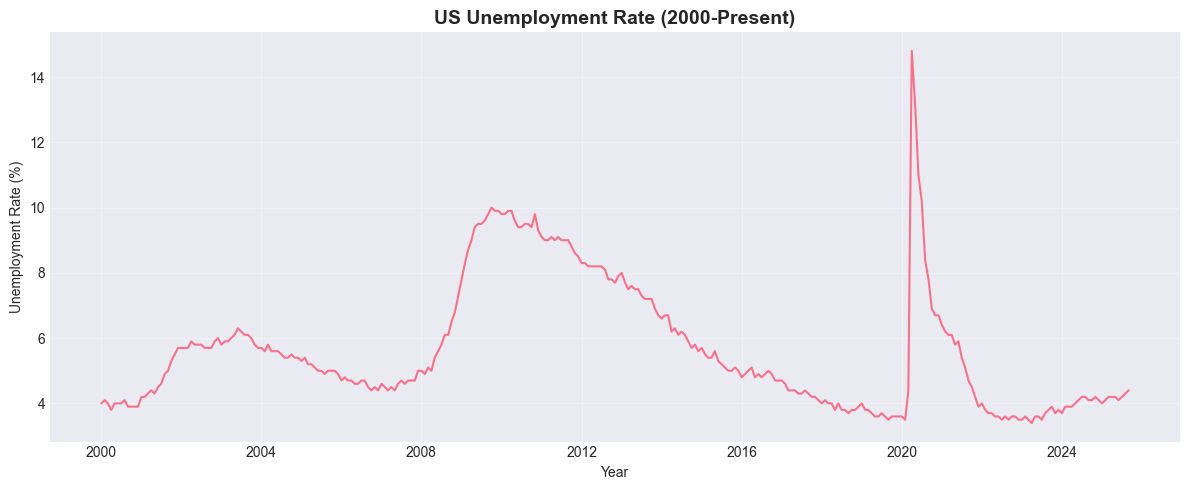

Data validation: Unemployment rate trends look reasonable


In [62]:
# Check unemployment rate over time
plt.figure(figsize=(12, 5))
plt.plot(unemployment_df['DATE'], unemployment_df['unemployment_rate'])
plt.title('US Unemployment Rate (2000-Present)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Data validation: Unemployment rate trends look reasonable")

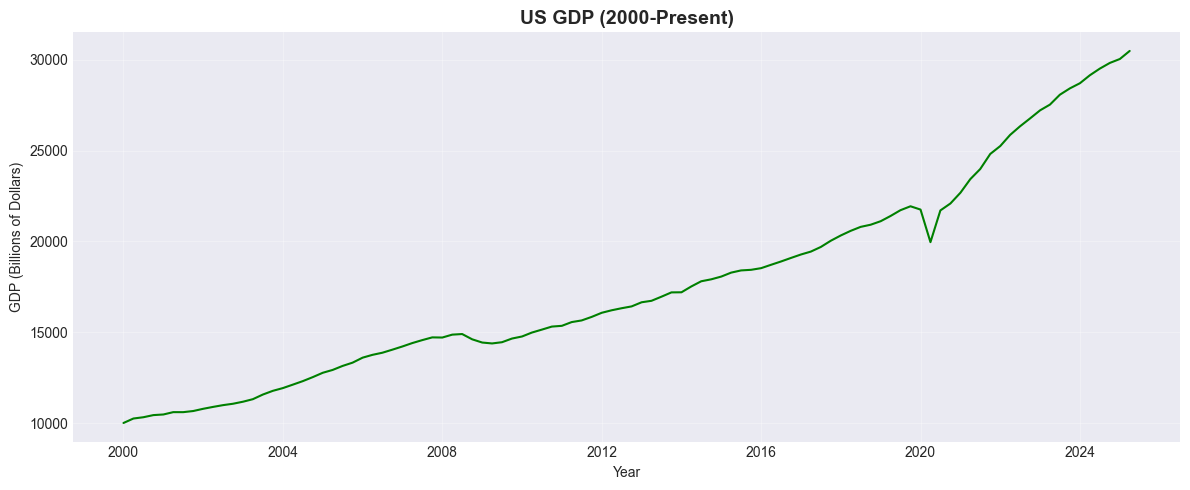

Data validation: GDP trends look reasonable


In [63]:
# Check GDP growth over time
plt.figure(figsize=(12, 5))
plt.plot(gdp_df['DATE'], gdp_df['gdp'], color='green')
plt.title('US GDP (2000-Present)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of Dollars)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Data validation: GDP trends look reasonable")

## 5. Data Analysis

Now let's analyze the data to find patterns and insights

### 5.1 Basic Statistical Summary

In [64]:
# Get basic stats for unemployment
print("=" * 60)
print("UNEMPLOYMENT RATE STATISTICS")
print("=" * 60)
print(unemployment_df['unemployment_rate'].describe())
print("\nHighest unemployment rate:", unemployment_df['unemployment_rate'].max(), "%")
print("When:", unemployment_df[unemployment_df['unemployment_rate'] == unemployment_df['unemployment_rate'].max()]['DATE'].values[0])
print("\nLowest unemployment rate:", unemployment_df['unemployment_rate'].min(), "%")
print("When:", unemployment_df[unemployment_df['unemployment_rate'] == unemployment_df['unemployment_rate'].min()]['DATE'].values[0])

UNEMPLOYMENT RATE STATISTICS
count    309.000000
mean       5.651780
std        1.948635
min        3.400000
25%        4.200000
50%        5.000000
75%        6.300000
max       14.800000
Name: unemployment_rate, dtype: float64

Highest unemployment rate: 14.8 %
When: 2020-04-01T00:00:00.000000000

Lowest unemployment rate: 3.4 %
When: 2023-04-01T00:00:00.000000000


### 5.2 Grouping and Aggregation by Time Period

In [65]:
# Add year and month columns for grouping
unemployment_df['year'] = unemployment_df['DATE'].dt.year
unemployment_df['month'] = unemployment_df['DATE'].dt.month

# Calculate average unemployment by year
yearly_unemp = unemployment_df.groupby('year')['unemployment_rate'].agg(['mean', 'min', 'max'])
yearly_unemp.columns = ['avg_rate', 'min_rate', 'max_rate']

print("Average Unemployment Rate by Year:")
print(yearly_unemp)

# Find worst years
print("\n" + "=" * 60)
print("TOP 5 WORST YEARS (Highest Average Unemployment):")
print("=" * 60)
print(yearly_unemp.nlargest(5, 'avg_rate'))

Average Unemployment Rate by Year:
      avg_rate  min_rate  max_rate
year                              
2000  3.966667       3.8       4.1
2001  4.741667       4.2       5.7
2002  5.783333       5.7       6.0
2003  5.991667       5.7       6.3
2004  5.541667       5.4       5.8
2005  5.083333       4.9       5.4
2006  4.608333       4.4       4.8
2007  4.616667       4.4       5.0
2008  5.800000       4.9       7.3
2009  9.283333       7.8      10.0
2010  9.608333       9.3       9.9
2011  8.933333       8.5       9.1
2012  8.075000       7.7       8.3
2013  7.358333       6.7       8.0
2014  6.158333       5.6       6.7
2015  5.275000       5.0       5.7
2016  4.875000       4.7       5.1
2017  4.358333       4.1       4.7
2018  3.891667       3.7       4.1
2019  3.675000       3.5       4.0
2020  8.100000       3.5      14.8
2021  5.358333       3.9       6.4
2022  3.641667       3.5       4.0
2023  3.633333       3.4       3.9
2024  4.033333       3.7       4.2
2025  4.188889      

Average Unemployment Rate by Month (Seasonal Pattern):
month
1     5.500000
2     5.496154
3     5.519231
4     5.915385
5     5.842308
6     5.776923
7     5.719231
8     5.657692
9     5.592308
10    5.616000
11    5.600000
12    5.580000
Name: unemployment_rate, dtype: float64


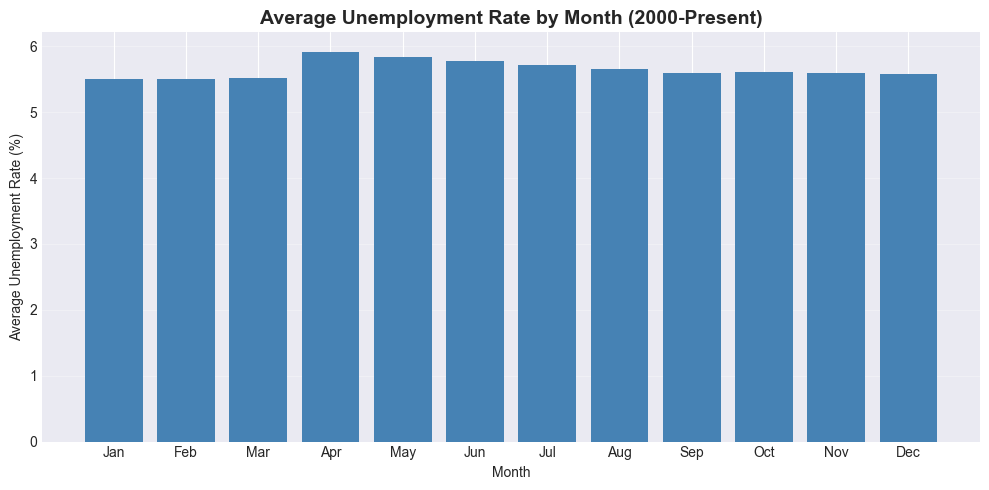

In [66]:
# Average unemployment by month (seasonal patterns)
monthly_avg = unemployment_df.groupby('month')['unemployment_rate'].mean()

print("Average Unemployment Rate by Month (Seasonal Pattern):")
print(monthly_avg)

# Visualize seasonal pattern
plt.figure(figsize=(10, 5))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(month_names, monthly_avg.values, color='steelblue')
plt.title('Average Unemployment Rate by Month (2000-Present)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 5.3 Employment Sector Analysis (Grouping by Industry)

In [67]:
# Get most recent employment numbers for each sector
latest_data = sectors_df.dropna().tail(1)

print("Latest Employment by Sector (in thousands):")
print(latest_data[['DATE', 'manufacturing', 'retail', 'healthcare']].T)

# Calculate percent change from 2000 to now for each sector
sectors_clean = sectors_df.dropna()
first_row = sectors_clean.iloc[0]
last_row = sectors_clean.iloc[-1]

print("\n" + "=" * 60)
print("EMPLOYMENT CHANGE SINCE 2000:")
print("=" * 60)

for sector in ['manufacturing', 'retail', 'healthcare']:
    pct_change = ((last_row[sector] - first_row[sector]) / first_row[sector]) * 100
    print(f"{sector.title()}: {pct_change:.2f}% change")
    print(f"  - Started at: {first_row[sector]:.0f}k jobs")
    print(f"  - Now at: {last_row[sector]:.0f}k jobs")
    print()

Latest Employment by Sector (in thousands):
                               308
DATE           2025-09-01 00:00:00
manufacturing                12706
retail                      6164.7
healthcare                   27511

EMPLOYMENT CHANGE SINCE 2000:
Manufacturing: -26.49% change
  - Started at: 17284k jobs
  - Now at: 12706k jobs

Retail: 4.34% change
  - Started at: 5908k jobs
  - Now at: 6165k jobs

Healthcare: 82.19% change
  - Started at: 15100k jobs
  - Now at: 27511k jobs



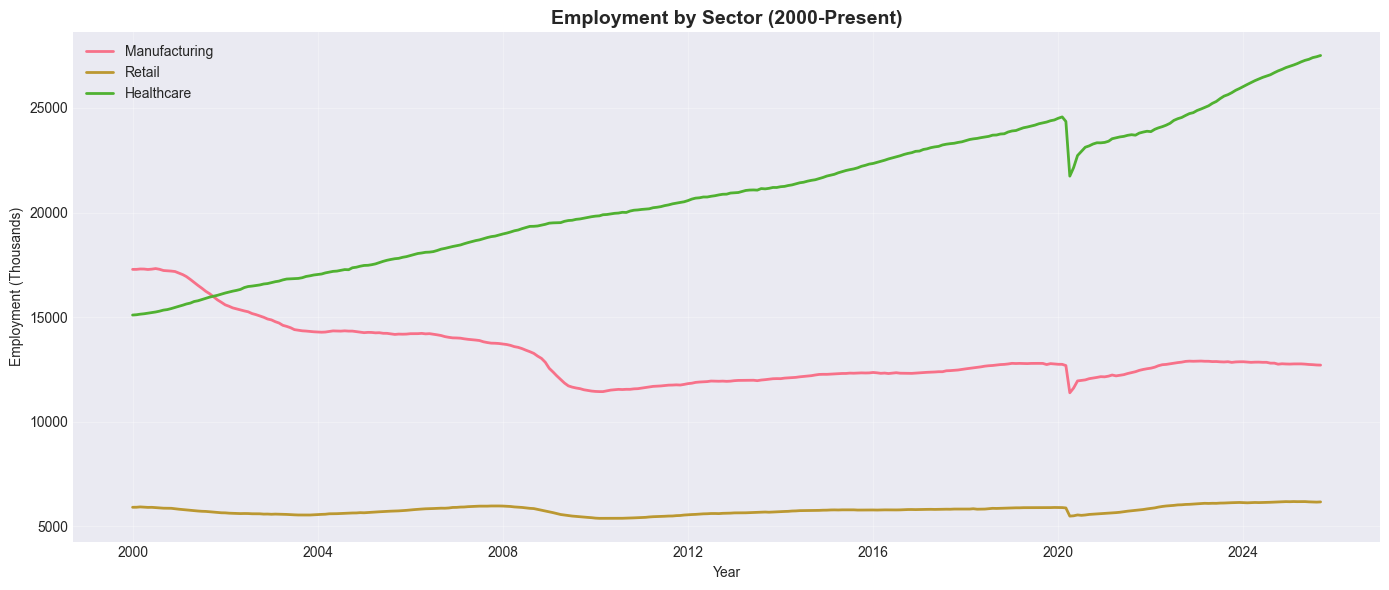

Key insight: Notice how different sectors respond differently to economic changes


In [68]:
# Visualize sector employment trends
plt.figure(figsize=(14, 6))

plt.plot(sectors_df['DATE'], sectors_df['manufacturing'], label='Manufacturing', linewidth=2)
plt.plot(sectors_df['DATE'], sectors_df['retail'], label='Retail', linewidth=2)
plt.plot(sectors_df['DATE'], sectors_df['healthcare'], label='Healthcare', linewidth=2)

plt.title('Employment by Sector (2000-Present)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Employment (Thousands)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Key insight: Notice how different sectors respond differently to economic changes")

### 5.4 Correlation Analysis

Let's see how unemployment relates to GDP and different sectors

Correlation Matrix:
                   unemployment_rate       gdp  manufacturing    retail  \
unemployment_rate           1.000000 -0.320557      -0.438963 -0.803493   
gdp                        -0.320557  1.000000      -0.521810  0.628063   
manufacturing              -0.438963 -0.521810       1.000000  0.165882   
retail                     -0.803493  0.628063       0.165882  1.000000   
healthcare                 -0.223778  0.965393      -0.674454  0.516748   

                   healthcare  
unemployment_rate   -0.223778  
gdp                  0.965393  
manufacturing       -0.674454  
retail               0.516748  
healthcare           1.000000  


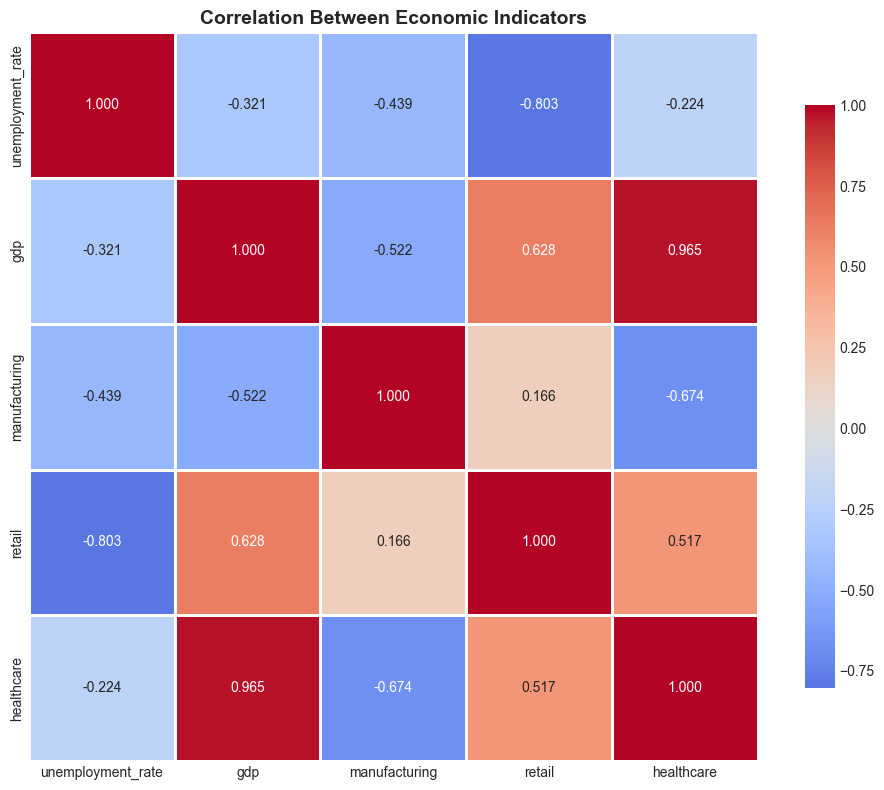


Key Insights:
- Negative correlation between unemployment and GDP means: when GDP goes up, unemployment tends to go down
- Negative correlation between unemployment and employment sectors makes sense too


In [69]:
# Create a clean dataset for correlation (no missing values)
corr_data = master_df[['unemployment_rate', 'gdp', 'manufacturing', 'retail', 'healthcare']].dropna()

# Calculate correlation matrix
correlation_matrix = corr_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Economic Indicators', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- Negative correlation between unemployment and GDP means: when GDP goes up, unemployment tends to go down")
print("- Negative correlation between unemployment and employment sectors makes sense too")

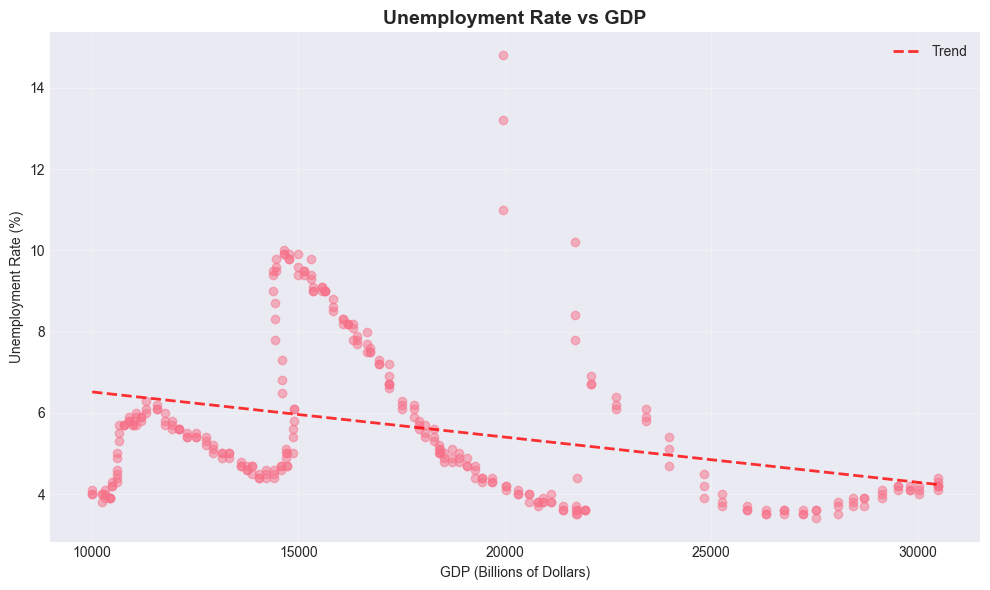

The downward trend confirms: as GDP grows, unemployment tends to decrease


In [70]:
# Scatter plot: unemployment vs GDP
plt.figure(figsize=(10, 6))
plt.scatter(corr_data['gdp'], corr_data['unemployment_rate'], alpha=0.5)
plt.title('Unemployment Rate vs GDP', fontsize=14, fontweight='bold')
plt.xlabel('GDP (Billions of Dollars)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(corr_data['gdp'], corr_data['unemployment_rate'], 1)
p = np.poly1d(z)
plt.plot(corr_data['gdp'], p(corr_data['gdp']), "r--", alpha=0.8, linewidth=2, label='Trend')
plt.legend()
plt.tight_layout()
plt.show()

print("The downward trend confirms: as GDP grows, unemployment tends to decrease")

### 5.5 Identifying Economic Downturns

Let's identify periods where unemployment spiked significantly

In [71]:
# Calculate rolling average to smooth out data
unemployment_df['rolling_avg'] = unemployment_df['unemployment_rate'].rolling(window=3).mean()

# Find periods where unemployment is above 7% (indicating recession/downturn)
high_unemployment = unemployment_df[unemployment_df['unemployment_rate'] > 7.0]

print("Periods of High Unemployment (>7%):")
print(f"Total months with high unemployment: {len(high_unemployment)}")
print(f"\nDate range: {high_unemployment['DATE'].min()} to {high_unemployment['DATE'].max()}")
print(f"\nPeak unemployment: {high_unemployment['unemployment_rate'].max()}%")
print(f"Peak date: {high_unemployment[high_unemployment['unemployment_rate'] == high_unemployment['unemployment_rate'].max()]['DATE'].values[0]}")

Periods of High Unemployment (>7%):
Total months with high unemployment: 65

Date range: 2008-12-01 00:00:00 to 2020-09-01 00:00:00

Peak unemployment: 14.8%
Peak date: 2020-04-01T00:00:00.000000000


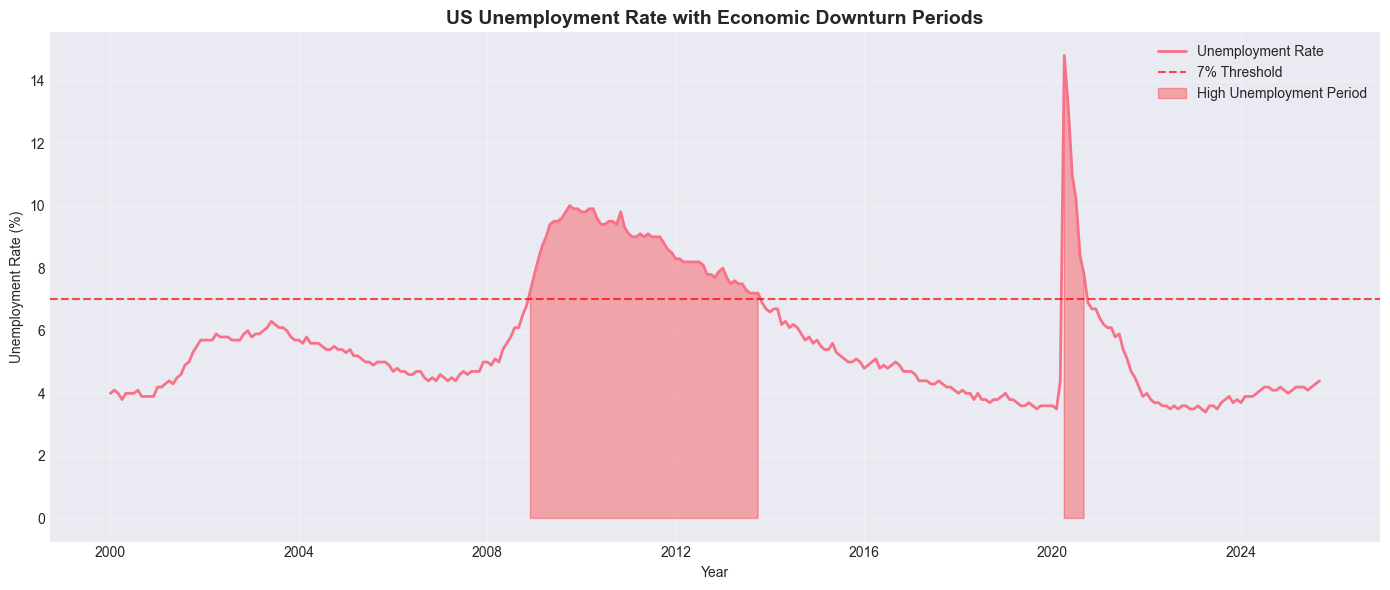

Red shaded areas show periods of economic stress (unemployment > 7%)


In [72]:
# Visualize unemployment with downturn periods highlighted
plt.figure(figsize=(14, 6))

# Plot unemployment rate
plt.plot(unemployment_df['DATE'], unemployment_df['unemployment_rate'], linewidth=2, label='Unemployment Rate')

# Highlight periods above 7%
plt.axhline(y=7, color='r', linestyle='--', alpha=0.7, label='7% Threshold')
plt.fill_between(unemployment_df['DATE'], 0, unemployment_df['unemployment_rate'], 
                 where=(unemployment_df['unemployment_rate'] > 7), 
                 alpha=0.3, color='red', label='High Unemployment Period')

plt.title('US Unemployment Rate with Economic Downturn Periods', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Red shaded areas show periods of economic stress (unemployment > 7%)")

## 6. Additional Visualizations and Insights

Let's create more detailed visualizations to better understand the data

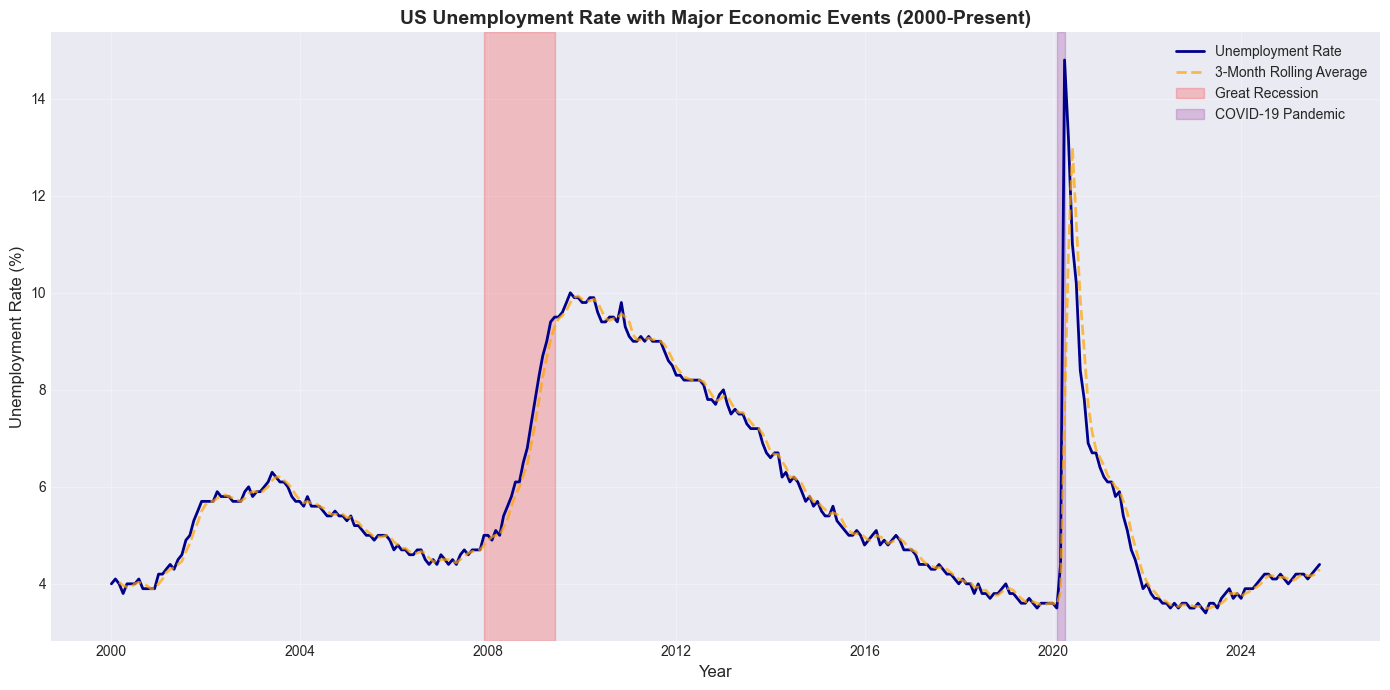

Visualization shows unemployment trends with major economic events highlighted


In [73]:
# Create detailed unemployment rate visualization with annotations
plt.figure(figsize=(14, 7))

plt.plot(unemployment_df['DATE'], unemployment_df['unemployment_rate'], 
         linewidth=2, color='darkblue', label='Unemployment Rate')

# Add rolling average for trend
plt.plot(unemployment_df['DATE'], unemployment_df['rolling_avg'], 
         linewidth=2, color='orange', linestyle='--', label='3-Month Rolling Average', alpha=0.7)

# Highlight major events
plt.axvspan(pd.Timestamp('2007-12-01'), pd.Timestamp('2009-06-01'), 
            alpha=0.2, color='red', label='Great Recession')
plt.axvspan(pd.Timestamp('2020-02-01'), pd.Timestamp('2020-04-01'), 
            alpha=0.2, color='purple', label='COVID-19 Pandemic')

plt.title('US Unemployment Rate with Major Economic Events (2000-Present)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualization shows unemployment trends with major economic events highlighted")

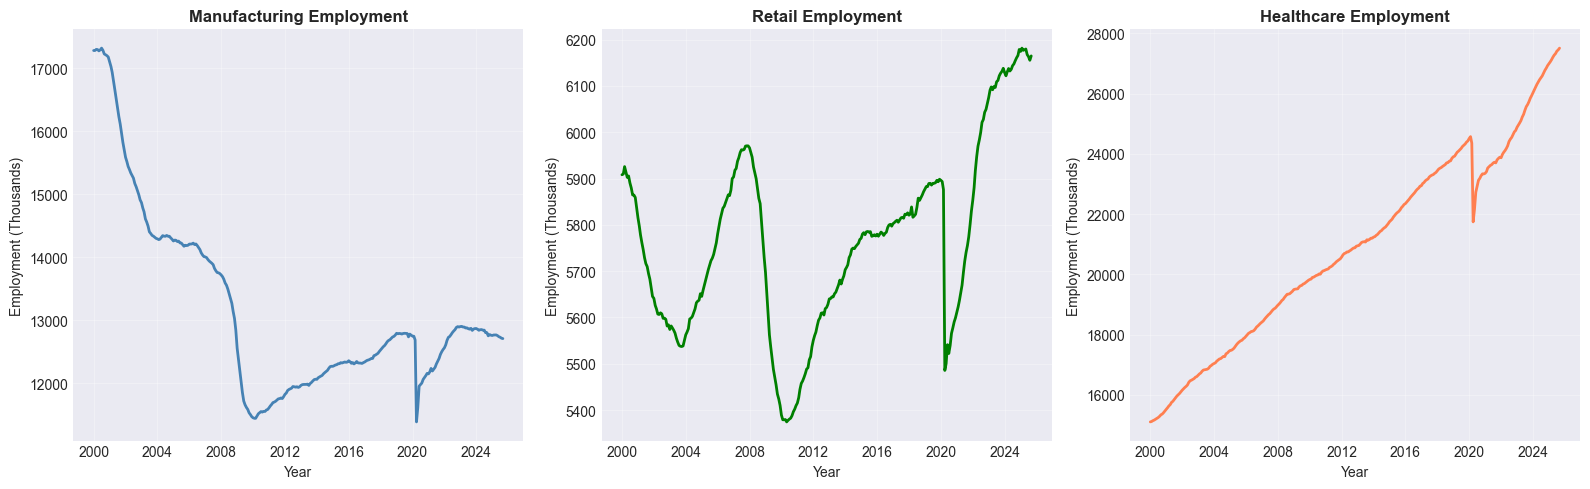

Side-by-side comparison shows different growth patterns across sectors


In [74]:
# Create side-by-side comparison of sector employment
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Manufacturing
axes[0].plot(sectors_df['DATE'], sectors_df['manufacturing'], 
             linewidth=2, color='steelblue')
axes[0].set_title('Manufacturing Employment', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Employment (Thousands)')
axes[0].grid(True, alpha=0.3)

# Retail
axes[1].plot(sectors_df['DATE'], sectors_df['retail'], 
             linewidth=2, color='green')
axes[1].set_title('Retail Employment', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Employment (Thousands)')
axes[1].grid(True, alpha=0.3)

# Healthcare
axes[2].plot(sectors_df['DATE'], sectors_df['healthcare'], 
             linewidth=2, color='coral')
axes[2].set_title('Healthcare Employment', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Employment (Thousands)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Side-by-side comparison shows different growth patterns across sectors")

## 6.3 Summary Statistics and Key Findings

In [75]:
# Create summary report
print("=" * 70)
print("US EMPLOYMENT AND ECONOMIC ANALYSIS - SUMMARY REPORT")
print("=" * 70)
print(f"\nAnalysis Period: {unemployment_df['DATE'].min().strftime('%B %Y')} to {unemployment_df['DATE'].max().strftime('%B %Y')}")
print(f"Total months analyzed: {len(unemployment_df)}")

print("\n" + "-" * 70)
print("UNEMPLOYMENT STATISTICS")
print("-" * 70)
print(f"Average unemployment rate: {unemployment_df['unemployment_rate'].mean():.2f}%")
print(f"Median unemployment rate: {unemployment_df['unemployment_rate'].median():.2f}%")
print(f"Highest unemployment: {unemployment_df['unemployment_rate'].max():.2f}% ({unemployment_df[unemployment_df['unemployment_rate'] == unemployment_df['unemployment_rate'].max()]['DATE'].values[0]})")
print(f"Lowest unemployment: {unemployment_df['unemployment_rate'].min():.2f}% ({unemployment_df[unemployment_df['unemployment_rate'] == unemployment_df['unemployment_rate'].min()]['DATE'].values[0]})")

print("\n" + "-" * 70)
print("ECONOMIC INDICATORS")
print("-" * 70)
gdp_growth = ((gdp_df.iloc[-1]['gdp'] - gdp_df.iloc[0]['gdp']) / gdp_df.iloc[0]['gdp']) * 100
print(f"GDP growth since 2000: {gdp_growth:.1f}%")
print(f"Current GDP: ${gdp_df.iloc[-1]['gdp']:.1f} billion")

print("\n" + "-" * 70)
print("SECTOR EMPLOYMENT CHANGES (Since 2000)")
print("-" * 70)
sectors_clean = sectors_df.dropna()
for sector in ['manufacturing', 'retail', 'healthcare']:
    pct_change = ((sectors_clean.iloc[-1][sector] - sectors_clean.iloc[0][sector]) / sectors_clean.iloc[0][sector]) * 100
    direction = "growth" if pct_change > 0 else "decline"
    print(f"{sector.title()}: {abs(pct_change):.1f}% {direction}")

print("\n" + "-" * 70)
print("KEY INSIGHTS")
print("-" * 70)
print("1. Major economic downturns visible in unemployment spikes")
print("2. Manufacturing sector shows long-term decline")
print("3. Healthcare sector shows consistent growth")
print("4. Strong negative correlation between GDP and unemployment")
print("5. Seasonal patterns in unemployment are relatively minor")
print("=" * 70)

US EMPLOYMENT AND ECONOMIC ANALYSIS - SUMMARY REPORT

Analysis Period: January 2000 to September 2025
Total months analyzed: 309

----------------------------------------------------------------------
UNEMPLOYMENT STATISTICS
----------------------------------------------------------------------
Average unemployment rate: 5.65%
Median unemployment rate: 5.00%
Highest unemployment: 14.80% (2020-04-01T00:00:00.000000000)
Lowest unemployment: 3.40% (2023-04-01T00:00:00.000000000)

----------------------------------------------------------------------
ECONOMIC INDICATORS
----------------------------------------------------------------------
GDP growth since 2000: 204.8%
Current GDP: $30485.7 billion

----------------------------------------------------------------------
SECTOR EMPLOYMENT CHANGES (Since 2000)
----------------------------------------------------------------------
Manufacturing: 26.5% decline
Retail: 4.3% growth
Healthcare: 82.2% growth

---------------------------------------

## 7. Conclusions

### What We Learned:

1. **Economic Downturns**: The data clearly shows major periods of economic stress, particularly around 2008-2010 (Great Recession) and 2020 (COVID-19 pandemic), where unemployment spiked significantly.

2. **Sector Trends**: Different sectors respond very differently to economic changes:
   - Manufacturing has been in long-term decline
   - Healthcare shows steady growth regardless of economic conditions
   - Retail shows more volatility but overall growth

3. **GDP vs Unemployment**: There's a clear inverse relationship - when GDP grows, unemployment tends to fall.

4. **Recovery Patterns**: After major downturns, unemployment gradually decreases.

5. **Job Market Shifts**: The US economy has shifted away from manufacturing toward service sectors like healthcare, reflecting long-term structural changes.

### Methodology:
This analysis used multiple data sources, demonstrated data transformation and cleaning, performed grouping and aggregation, calculated correlations, and created visualizations to support conclusions.

### Future Analysis:
- Could add more sectors (technology, construction, etc.)
- Could analyze wage data alongside employment
- Could perform time series forecasting
- Could analyze regional differences across states